# Practical Work 7 - SVM

## Students
- Flavia Pittet
- Fabio Vitali


## Exercise - 1 Digit classification system using different SVM classifiers

### a. Getting the training and test sample sets from the MNIST database

(same code as PW02)


Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


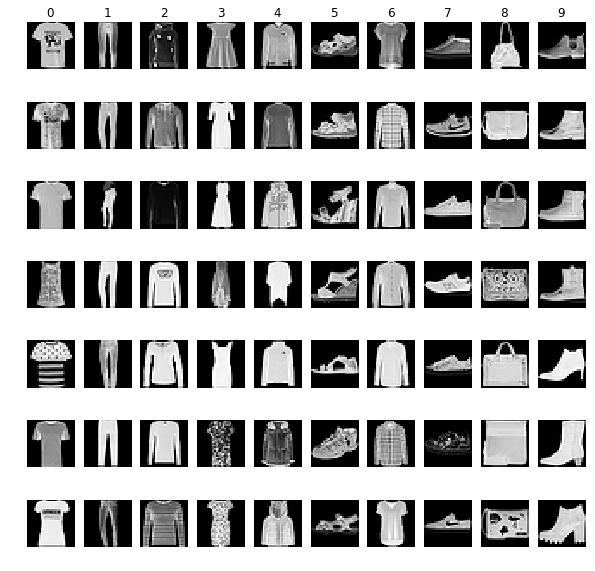

Subsampled training data shape:  (200, 28, 28)
Subsampled training labels shape:  (200,)
Subsampled test data shape:  (100, 28, 28)
Subsampled test labels shape:  (100,)


In [5]:
# Run some setup code for this notebook.
# we will be using the MNIST dataset from zalando https://github.com/zalandoresearch/fashion-mnist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# This is a method to read the MNIST dataset from a ROOT directory
def load_MNIST(ROOT):
  '''load all of mnist
  training set first'''
  Xtr = []
  train = pd.read_csv(os.path.join(ROOT, 'fashion-mnist_train.csv'))
  X = np.array(train.drop('label', axis=1))
  Ytr = np.array(train['label'])
  # With this for-loop we give the data a shape of the actual image (28x28)
  # instead of the shape in file (1x784)
  for row in X:
      Xtr.append(row.reshape(28,28))
  # load test set second
  Xte = []
  test = pd.read_csv(os.path.join(ROOT, 'fashion-mnist_test.csv'))
  X = np.array(test.drop('label', axis=1))
  Yte = np.array(test['label'])
  # same reshaping
  for row in X:
      Xte.append(row.reshape(28,28))
  
  return np.array(Xtr), np.array(Ytr), np.array(Xte), np.array(Yte)


# Load the raw MNIST data.
mnist_dir = './data'   # TODO: Fabio to update
X_train, y_train, X_test, y_test = load_MNIST(mnist_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Now let's visualise some of the images
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# Subsample the data for more efficient code execution in this exercise. We do this to make it go faster. 
# When you will have completed the whole notebook, you can run it again on a larger (or total) dataset 
# and observe the difference in terms of accuracy (and speedup).
num_training = 200
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# TODO: sanity check: write code to print out the size of the subsampled training and test data.
print('Subsampled training data shape: ', X_train.shape)
print('Subsampled training labels shape: ', y_train.shape)
print('Subsampled test data shape: ', X_test.shape)
print('Subsampled test labels shape: ', y_test.shape)


### b. Classification of digits based on raw pixel values using SVM and different kernels

### c. (Optional) Impact of preprocessing and feature extraction

### d. Analysis of the results